# Data analysis for the ISMAR article

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols

from ast import literal_eval
from os import listdir
from os.path import join

Configurations:

In [161]:
sns.set(style="whitegrid", color_codes=True)

Load the csv data files:

In [94]:
data_path = "data/"

participants_filepath = join(data_path, "participants.csv")
participants = pd.read_csv(participants_filepath)

trials = []
details = []
for file in listdir(data_path):
    filepath = join(data_path, file)
    if file.endswith("trials.csv"): # The trial files end with trials.csv
        trials.append(pd.read_csv(filepath))
    elif file.endswith("details.csv"):
        details.append(pd.read_csv(filepath))
trials = pd.concat(trials, ignore_index=True)
details = pd.concat(details, ignore_index=True)

techniques = trials.drop_duplicates('technique_id').loc[:, ['technique_id', 'technique_name']].reset_index(drop=True)
text_size = trials.drop_duplicates('text_size_id').loc[:, ['text_size_id', 'text_size_name']].reset_index(drop=True)
distance = trials.drop_duplicates('distance_id').loc[:, ['distance_id', 'distance_name']].reset_index(drop=True)
techniques.columns = text_size.columns = distance.columns = ['id', 'name']

Analysis of rates of the participants:

In [201]:
def getParticipantRates(rate_label):
    rates = []
    for index, participant in participants.iterrows():
        rate = literal_eval(participant[rate_label])
        for i in range(len(rate)):
            technique_id= i+1
            rates.append([participant['participant_id'], technique_id, frustration[i]])
    rates = pd.DataFrame(rates, columns=['participant_id', 'technique_id', 'rate'])
    return rates

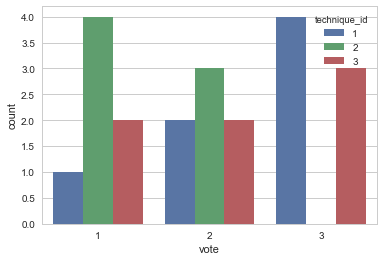

In [162]:
preferences = pd.Series(0, name='count', index=pd.MultiIndex.from_product([techniques.id, [1, 2, 3]], names=['technique_id', 'vote']))
for preference in participants['preference']:
    preference = literal_eval(preference)
    for i in range(len(preference)):
        preferences[i+1, preference[i]] += 1;
        
preferences = preferences.reset_index()
sns.barplot(x='vote', y='count', hue='technique_id', data=preferences);

In [198]:
frustrations = []
for index, participant in participants.iterrows():
    frustration = literal_eval(participant['frustration'])
    for i in range(len(frustration)):
        frustrations.append([participant['participant_id'], i+1, frustration[i]])
frustrations = pd.DataFrame(frustrations, columns=['participant_id', 'technique_id', 'mark']) 

frustrations = getParticipantRates('frustration')
sns.countplot(x='technique_id', hue='mark', data=frustrations);

ValueError: malformed node or string: 0    [3,5,2]
1    [1,3,3]
2    [5,5,4]
3    [3,5,1]
4    [5,5,2]
5    [3,3,1]
6    [1,1,1]
Name: frustration, dtype: object